In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras import regularizers

Using TensorFlow backend.


In [0]:
(train_data, train_labels),(test_data, test_labels) =imdb.load_data(num_words =10000)

In [3]:
train_data.shape

(25000,)

In [4]:
test_data.shape

(25000,)

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
max([max(sequence) for sequence in test_data])

9999

# we need to convert our integer into integer tensors

In [0]:
def vector_sequence(sequences, dimension =10000):
  results =np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] =1.
  return results
x_test =vector_sequence(test_data)
x_train =vector_sequence(train_data)


In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test =np.asarray(test_labels).astype('float32')

In [9]:
y_train[0]

1.0

In [10]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

# we need to build our model here

In [0]:
model_1 =models.Sequential()
model_1.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001) , activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(32,kernel_regularizer=regularizers.l2(0.001) , activation='relu'))
model_1.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001) , activation='relu'))
model_1.add(layers.Dense(1, activation='softmax'))

# compile our network

In [0]:
model_1.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics =['accuracy'])

In [0]:
x_val =x_train[:10000]
y_val =y_train[:10000]
part_x_train =x_train[10000:]
part_y_train =y_train[10000:]



In [0]:
model_1.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics =['accuracy'])

In [15]:
network_1 =model_1.fit(part_x_train, part_y_train, batch_size=512, epochs=20, validation_data =(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 119us/step - loss: 7.7832 - accuracy: 0.4965 - val_loss: 7.5884 - val_accuracy: 0.5053
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 7.7591 - accuracy: 0.4965 - val_loss: 7.5757 - val_accuracy: 0.5053
Epoch 3/20
15000/15000 [==============================] - 2s 108us/step - loss: 7.7478 - accuracy: 0.4965 - val_loss: 7.5657 - val_accuracy: 0.5053
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 7.7389 - accuracy: 0.4965 - val_loss: 7.5581 - val_accuracy: 0.5053
Epoch 5/20
15000/15000 [==============================] - 2s 107us/step - loss: 7.7323 - accuracy: 0.4965 - val_loss: 7.5525 - val_accuracy: 0.5053
Epoch 6/20
15000/15000 [==============================] - 2s 107us/step - loss: 7.7275 - accuracy: 0.4965 - val_loss: 7.5486 - val_accuracy: 0.5053
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [0]:
history_dic=network_1.history

In [17]:
history_dic.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [0]:
loss =history_dic['val_loss']
val_loss_values =history_dic['val_loss']

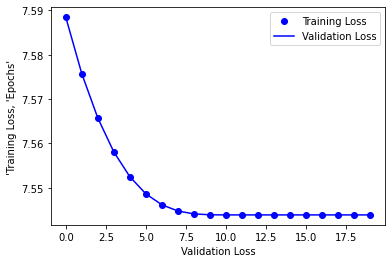

In [19]:
plt.plot(loss,'bo', label ='Training Loss')
plt.plot(val_loss_values, 'b', label='Validation Loss')
plt.xlabel('Validation Loss')
plt.ylabel("'Training Loss, 'Epochs'")
plt.legend()

In [0]:
from keras import regularizers
model_2=models.Sequential()
model_2.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001) ,   activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001) , activation='relu'))
model_2.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001) , activation='relu'))
model_2.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001) , activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model_2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
network_2 =model_2.fit(part_x_train, part_y_train, epochs =50, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 2s 105us/step - loss: 0.5968 - accuracy: 0.7776 - val_loss: 0.4535 - val_accuracy: 0.8626
Epoch 2/50
15000/15000 [==============================] - 1s 93us/step - loss: 0.3664 - accuracy: 0.8971 - val_loss: 0.3870 - val_accuracy: 0.8721
Epoch 3/50
15000/15000 [==============================] - 1s 95us/step - loss: 0.2824 - accuracy: 0.9257 - val_loss: 0.3451 - val_accuracy: 0.8919
Epoch 4/50
15000/15000 [==============================] - 1s 93us/step - loss: 0.2485 - accuracy: 0.9358 - val_loss: 0.4366 - val_accuracy: 0.8572
Epoch 5/50
15000/15000 [==============================] - 1s 93us/step - loss: 0.2182 - accuracy: 0.9504 - val_loss: 0.3669 - val_accuracy: 0.8843
Epoch 6/50
15000/15000 [==============================] - 1s 94us/step - loss: 0.2152 - accuracy: 0.9497 - val_loss: 0.3759 - val_accuracy: 0.8829
Epoch 7/50
15000/15000 [==============================] - 1s 95us/s

In [23]:
network_2_dict =network_2.history
network_2_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [0]:
loss_Values =network_2_dict['loss']
val_loss_Values =network_2_dict['val_loss']


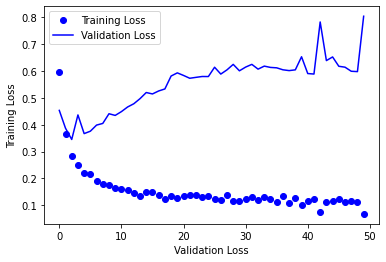

In [47]:
#plt.figure(figsize=(10, 7))
plt.plot(loss_Values, 'bo', label ='Training Loss')
plt.plot(val_loss_Values, 'b', label='Validation Loss')
plt.xlabel('Validation Loss')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

In [0]:
val_acc =network_2_dict['val_accuracy']
training_acc =network_2_dict['accuracy']


Text(0, 0.5, 'Training Accuracy')

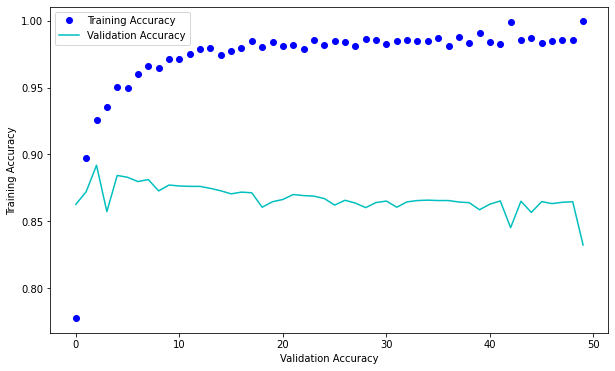

In [27]:
plt.figure(figsize=(10,6))
plt.plot(training_acc, 'bo', label='Training Accuracy')
plt.plot(val_acc, 'c', label='Validation Accuracy')
plt.legend()
plt.xlabel('Validation Accuracy')
plt.ylabel('Training Accuracy')


In [28]:
my_evaluate_1 =model_1.evaluate(part_x_train, part_y_train)

15000/15000 [==============================] - 1s 75us/step


In [29]:
my_evaluate_1

[7.678565098063151, 0.49646666646003723]

In [30]:
my_evaluate_2 =model_2.evaluate(part_x_train, part_y_train)

15000/15000 [==============================] - 1s 65us/step


In [31]:
my_evaluate_2

[0.15462650665442149, 0.9539999961853027]

In [0]:
y_pred_1 =model_1.predict(x_test)

In [33]:
print(y_pred_1)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [0]:
y_predi_2 =model_2.predict(x_test)

In [35]:
print(y_predi_2)

[[0.00431666]
 [0.99996114]
 [0.20174646]
 ...
 [0.00125569]
 [0.00275564]
 [0.9665929 ]]
